# 2.2 파이썬으로 퍼셉트론 학습 알고리즘 구현

### 2.2.1 객체 지향 퍼셉트론 API

- 객체 지향 방식을 사용해 퍼셉트론 인터페이스를 가진 파이썬 클래스를 정의
- Perceptron 객체 초기화
- fit 메서드로 학습
- net_input()으로 최종 입력 계산
- predict 메서드로 예측

In [1]:
import numpy as np

class Perceptron():
    def __init__(self, eta=0.01, epochs=50, random_state=1):
        self.eta = eta; # learning rate
        self.epochs = epochs # 반복 횟수(epochs)
        self.random_state = random_state # RandomState초기화할때 쓸값
        
    
        # 학습
    def fit(self, X, y):
        # np.random.seed()는 global numpy state에 영향을 주는데
        # np.random.RandomState()로 객체 생성하면 영향 안주고 따로 쓸 수 있음
        rgen = np.random.RandomState(self.random_state)
        
        # loc   : 분포의 중심 위치
        # scale : 표준 편차
        # size : 크기 (0번째 항까지 포함하려고 +1해줌)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]+1) 
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0]  += update # x0는 1이므로 update*x0 = update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
                
            self.errors_.append(errors)
            
                
        # 예측 결과
    def predict(self, xi):
        # np.where()은 아래와 같이 3항연산자처럼 쓸 수 있음
        return np.where(self.net_input(xi) >= 0.0, 1, -1)
        
        
        # 벡터의 dot product
    def net_input(self, xi):
        return np.dot(xi, self.w_[1:]) + self.w_[0]

- Weight를 정규분포로 초기화 하는 이유
    - weight를 0으로 초기화 하면, **학습률 $\eta$가 가중치 벡터의 크기에만(방향x) 영향**을 미치게 되며 이는 분류 결과에 영향을 주지 못하게 됨
    - 꼭 정규분포가 아니어도 0이되지 않는 랜덤한 작은 값을 주기만 하면 됨

### 2.2.2 붓꽃 데이터셋에서 퍼셉트론 훈련

- 붓꽃 데이터셋에서 Setosa와 Versicolor 2개의 class만 사용
- 시각화를 위해 feature는 꽃받침 길이와 꽃잎 길이만 고려
- 퍼셉트론 알고리즘은 다중 클래스 분류로도 확장이 가능함 (OvA(One-versus-All) 또는 OvR(One-versus-Rest)를 사용)
    - OvA, OvR
        - 각 해당하는 클래스를 +, 다른 클래스를 -로 생각하는 방식
        - 총 클래스 수와 같은 수의 분류기를 사용

In [2]:
# 붓꽃 데이터셋 로드
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


(100, 2)


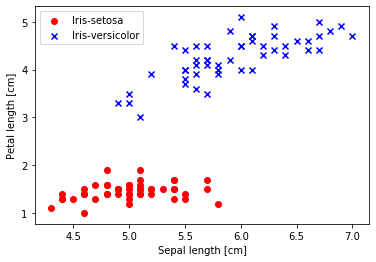

In [3]:
import matplotlib.pyplot as plt

# 4번째 열이 class
# Iris-setosa면 1, Iris-versicolor -1
y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa', 1, -1)

# 2번째, 4번째 열이 각각 꽃받침 길이, 꽃잎 길이
X = df.iloc[0:100, [0, 2]].values
print(X.shape)

# 산점도 그리기
plt.scatter(x=X[:50, 0], y=X[:50, 1], color='red', marker='o', label='Iris-setosa')
plt.scatter(x=X[50:, 0], y=X[50:, 1], color='blue', marker='x', label='Iris-versicolor')
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc='best')
plt.show()

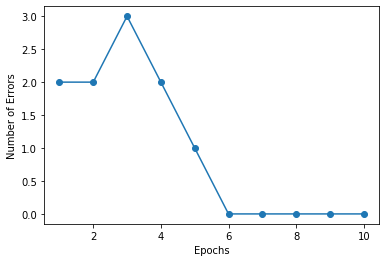

weight vector : [ 0.41624345  0.75388244 -1.86528172]


In [4]:
# Perceptron으로 학습

p = Perceptron(eta=0.1, epochs=10)
p.fit(X, y)
plt.plot(range(1, p.epochs+1), p.errors_, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Number of Errors")
plt.show()

print("weight vector :", p.w_)

**6번째 epoch이후 수렴하였고, 완벽히 분류 했음**

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # matplotlib에서 정의한 점 표시 모양
    markers = ('s', 'x', 'o', '^', 'v')
    # 각 점을 표시할 색깔
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # y에 있는 class의 수 만큼의 color map을 만듦
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 각 feature의 최소값-1에서, 최대값+1까지 resolution간격인 배열을 만들고
    # 그 배열들을 각각 X, Y축으로 하는 좌표 평면 배열을 만듦
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # feature의 범위로 이루어진 좌표 평면 배열을 
    # 우리가 만든 퍼셉트론의 predict()에 인자로 전달해
    # predict값으로 이루어진 좌표 평면 배열을 만듦
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # 위에서 만든 predict값 좌표 평면 그리드를
    # contourf()를 통해 등고선 그래프로 그린다.
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # 산점도 그리기
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

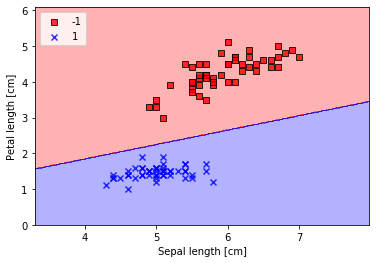

In [6]:
plot_decision_regions(X, y, classifier=p)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()